In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [25]:
df1 = pd.read_csv("../csv/main.csv")

In [26]:
df1.shape

(488, 11)

In [27]:
df1.describe()

,Per Capita Income (2016),All People Under PL(%),Female household under PL (%),%onFoodStamps,DIABETES_AdjPrev,OBESITY_AdjPrev,DENTAL_AdjPrev,% of pop 15+ not married,% of Pop 15+ Now Married
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,30134.411885,16.054508,26.460451,13.851434,10.289754,29.085246,62.169262,38.303279,45.422951
std,9834.990940,7.316350,10.808012,8.329978,2.374829,5.755421,7.458220,8.181947,8.420607
min,13652.000000,2.700000,2.100000,0.900000,5.400000,15.200000,38.800000,20.000000,23.400000
25%,23389.000000,10.500000,18.200000,7.600000,8.475000,25.075000,56.700000,32.600000,39.675000
50%,27794.500000,15.500000,27.100000,12.900000,10.100000,29.150000,62.100000,37.100000,45.800000
75%,34423.250000,20.400000,33.525000,18.200000,11.700000,33.100000,67.500000,43.600000,51.025000
max,85801.000000,44.500000,63.900000,47.900000,18.200000,47.200000,79.700000,62.800000,67.300000


In [28]:
corr_matrix = df1.corr()
corr_matrix['All People Under PL(%)'].sort_values(ascending=False)

All People Under PL(%)           1.000000
Female household under PL (%)    0.800453
%onFoodStamps                    0.776293
OBESITY_AdjPrev                  0.724492
DIABETES_AdjPrev                 0.722793
% of pop 15+ not married         0.718928
Per Capita Income (2016)        -0.651488
DENTAL_AdjPrev                  -0.701787
% of Pop 15+ Now Married        -0.792834
Name: All People Under PL(%), dtype: float64

Multivariate Linear Regression
==============

In [29]:
X1 = df1[[
    "Female household under PL (%)",
    "%onFoodStamps",
    "OBESITY_AdjPrev",
    "DIABETES_AdjPrev",
    "% of pop 15+ not married",
    "Per Capita Income (2016)",
    "DENTAL_AdjPrev",
    "% of Pop 15+ Now Married"
]]

y1 = df1['All People Under PL(%)']

In [30]:
y1 = y1.values.reshape(-1, 1)

print(y1.shape, X1.shape)

(488, 1) (488, 8)


In [31]:
mlr = LinearRegression()
mlr.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
score = mlr.score(X1, y1)
print(f"R2 Score: {score}")

R2 Score: 0.862915373193716


residuals

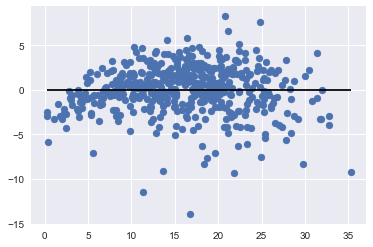

In [33]:
predictions = mlr.predict(X1)
# Plot Residuals
plt.scatter(predictions, predictions - y1)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

POV vs. Households Under PL led by Female (no male authority figure, %)
===============

In [34]:
X2 = df1["Female household under PL (%)"].values.reshape(-1, 1)
y2 = df1['All People Under PL(%)'].values.reshape(-1, 1)
print("Shape: ", X2.shape, y2.shape)

Shape:  (488, 1) (488, 1)


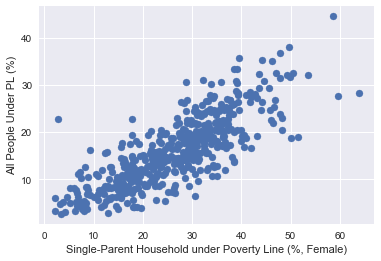

In [35]:
plt.scatter(X2, y2)
plt.xlabel("Single-Parent Household under Poverty Line (%, Female)")
plt.ylabel("All People Under PL (%)")

In [52]:
lr2_ = LinearRegression()
lr2_.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
predictions = lr2_.predict(X2)
print(f"True output: {y2[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y2[0]}")

True output: [24.5]
Predicted output: [20.95265091]
Prediction Error: [-3.54734909]


In [54]:
x2_min = np.array([[X2.min()]])
x2_max = np.array([[X2.max()]])
y2_min = lr2_.predict(x2_min)
y2_max = lr2_.predict(x2_max)

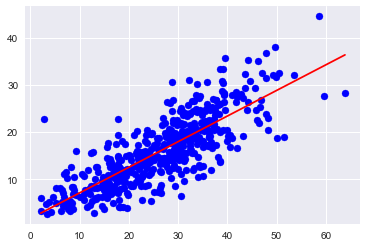

In [55]:
plt.scatter(X2, y2, c='blue')
plt.plot([x2_min[0], x2_max[0]], [y2_min[0], y2_max[0]], c='red')

In [ ]:
lr2_.score()

In [49]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)
lr2 = LinearRegression()

In [50]:
lr2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
predicted = lr2.predict(X2_test)

# Score the predictions with mse and r2
mse2 = mean_squared_error(y2_test, predicted)
r22 = r2_score(y2_test, predicted)

print(f"Mean Squared Error (MSE): {mse2}")
print(f"R-squared (R2 ): {r22}")

Mean Squared Error (MSE): 17.200311767350943
R-squared (R2 ): 0.6557456906123491


POV v. Obesity
=============

In [58]:
X3 = df1["OBESITY_AdjPrev"].values.reshape(-1, 1)
y3 = df1['All People Under PL(%)'].values.reshape(-1, 1)
print("Shape: ", X3.shape, y3.shape)

Shape:  (488, 1) (488, 1)


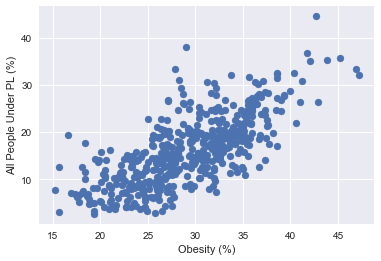

In [59]:
plt.scatter(X3, y3)
plt.xlabel("Obesity (%)")
plt.ylabel("All People Under PL (%)")

In [60]:
lr3_ = LinearRegression()
lr3_.fit(X3, y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
predictions = lr3_.predict(X3)
print(f"True output: {y3[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y3[0]}")

True output: [24.5]
Predicted output: [25.18581355]
Prediction Error: [0.68581355]


In [62]:
x3_min = np.array([[X3.min()]])
x3_max = np.array([[X3.max()]])
y3_min = lr3_.predict(x3_min)
y3_max = lr3_.predict(x3_max)

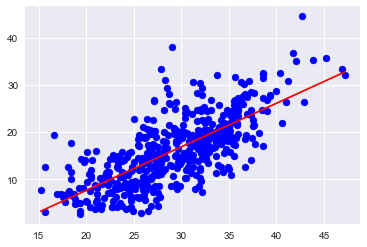

In [63]:
plt.scatter(X3, y3, c='blue')
plt.plot([x3_min[0], x3_max[0]], [y3_min[0], y3_max[0]], c='red')

POV vs. % of Pop 15 or over Now Married
===================

In [64]:
X4 = df1["% of Pop 15+ Now Married"].values.reshape(-1, 1)
y4 = df1['All People Under PL(%)'].values.reshape(-1, 1)
print("Shape: ", X4.shape, y4.shape)

Shape:  (488, 1) (488, 1)


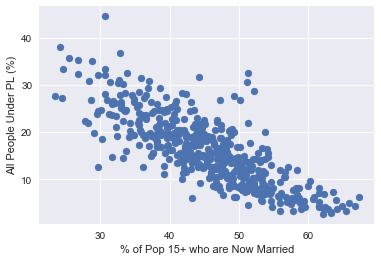

In [65]:
plt.scatter(X4, y4)
plt.xlabel("% of Pop 15+ who are Now Married")
plt.ylabel("All People Under PL (%)")

In [66]:
lr4_ = LinearRegression()
lr4_.fit(X4, y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
predictions = lr4_.predict(X4)
print(f"True output: {y4[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y4[0]}")

True output: [24.5]
Predicted output: [24.26779892]
Prediction Error: [-0.23220108]


In [68]:
x4_min = np.array([[X4.min()]])
x4_max = np.array([[X4.max()]])
y4_min = lr4_.predict(x4_min)
y4_max = lr4_.predict(x4_max)

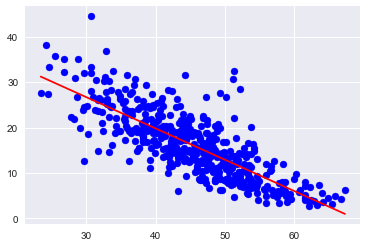

In [69]:
plt.scatter(X4, y4, c='blue')
plt.plot([x4_min[0], x4_max[0]], [y4_min[0], y4_max[0]], c='red')